#                                        DIABETES PREDICTION


In [1]:
import pandas as pd #Importing basic libraries
import numpy as np

In [25]:
df=pd.read_csv(r"diabetes.csv")

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,4.50000,129.400000,61.700000,17.800000,116.150000,30.950000,0.511650,37.450000,0.65000
std,3.56149,35.354446,26.159631,17.733703,215.843821,9.654424,0.513691,11.591626,0.48936
min,0.00000,78.000000,0.000000,0.000000,0.000000,0.000000,0.134000,21.000000,0.00000
25%,1.00000,106.000000,57.500000,0.000000,0.000000,26.975000,0.198500,30.750000,0.00000
50%,4.50000,117.000000,70.000000,21.000000,0.000000,30.300000,0.374500,32.000000,1.00000
75%,7.25000,152.500000,74.000000,32.750000,114.000000,35.875000,0.560000,50.250000,1.00000
max,10.00000,197.000000,96.000000,47.000000,846.000000,45.800000,2.288000,59.000000,1.00000


In [4]:
df.isnull().sum() # data cleaning

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.isnull().values.any()

False

In [6]:
df.info()  # full information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.count()  # non null values 

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [27]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
cooo=df.corr()
cooo

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


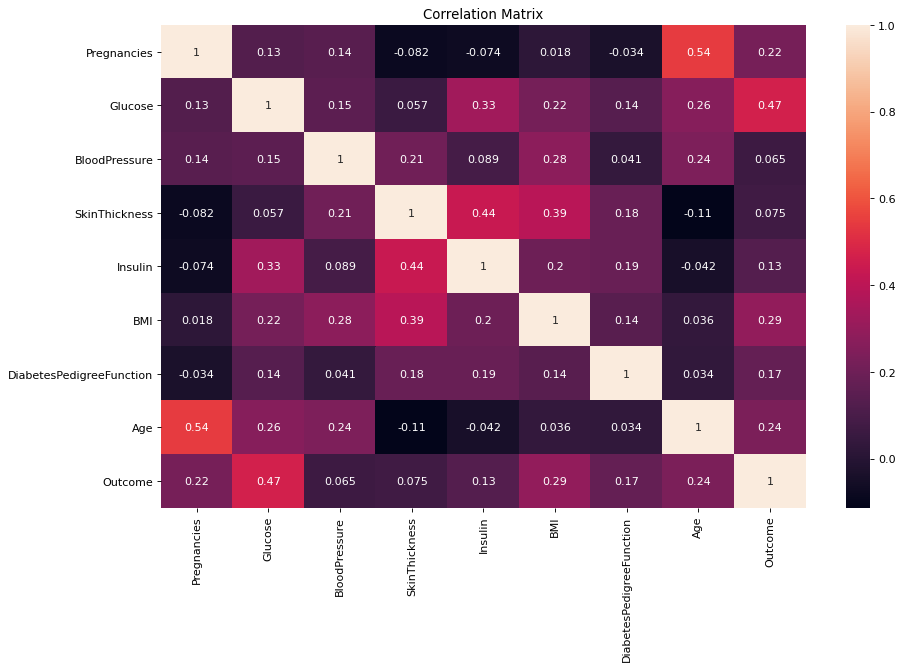

In [28]:
import matplotlib.pyplot as plt
import seaborn as sn




from matplotlib.pyplot import figure

figure(figsize=(13, 8), dpi=80)
cooo.style.background_gradient(cmap='coolwarm').set_precision(2)
sn.heatmap(cooo, annot=True)
plt.title('Correlation Matrix')
#plt(figsize=(8, 6), dpi=80)
plt.show()

In [11]:
df=df.iloc[:20,:]

# Visualization plots 

<AxesSubplot:>

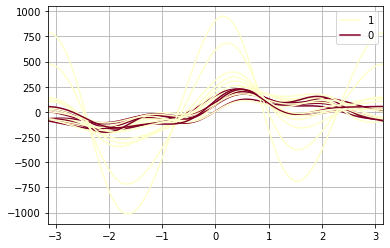

In [12]:
from pandas.plotting import andrews_curves

andrews_curves(df,'Outcome',colormap='YlOrRd')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

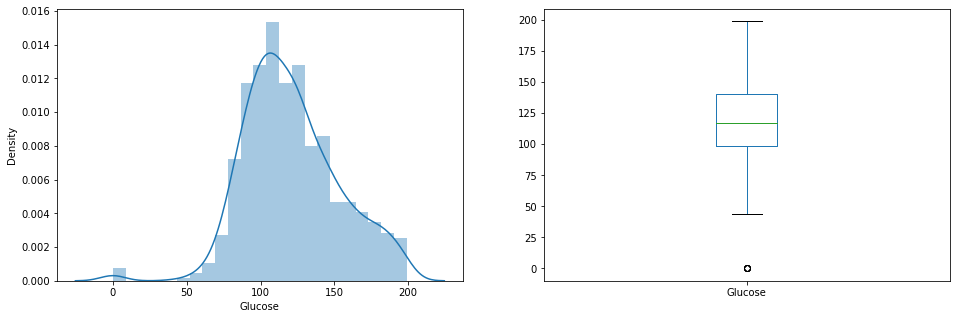

In [35]:
#sn.displot(df, x="Pregnancies", binwidth=3)
plt.figure(1)
plt.subplot(121),sn.distplot(df['Glucose'])
plt.subplot(122),df['Glucose'].plot.box(figsize=(16,5))
plt.show

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

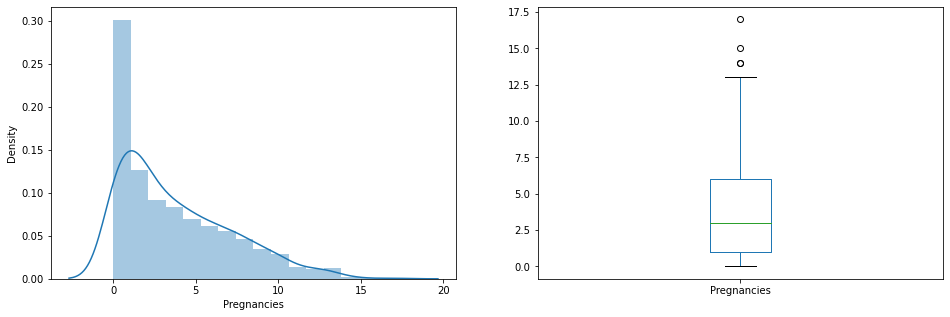

In [36]:
#sn.displot(df, x="Pregnancies", binwidth=3)
plt.figure(2)
plt.subplot(121),sn.distplot(df['Pregnancies'])
plt.subplot(122),df['Pregnancies'].plot.box(figsize=(16,5))
plt.show

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


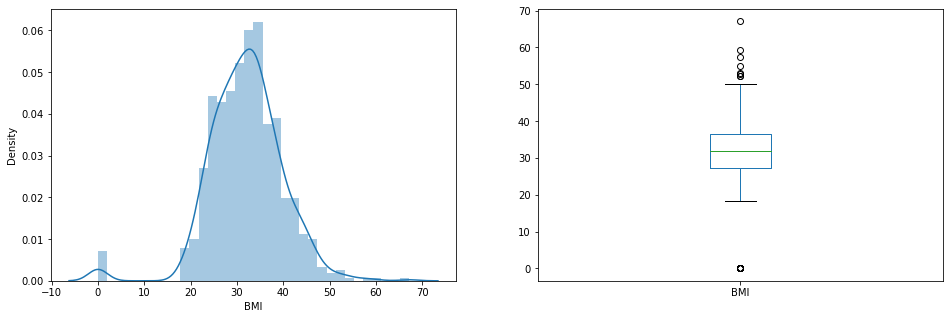

In [40]:
plt.subplot(121),sn.distplot(df['BMI'])
plt.subplot(122),df['BMI'].plot.box(figsize=(16,5))
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


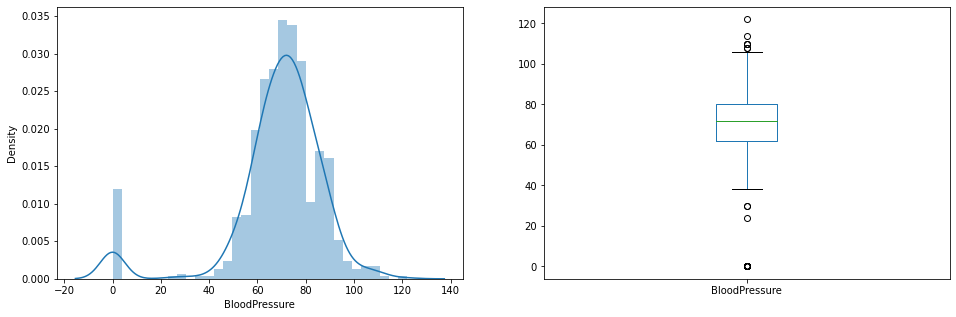

In [41]:
plt.subplot(121),sn.distplot(df['BloodPressure'])
plt.subplot(122),df['BloodPressure'].plot.box(figsize=(16,5))
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


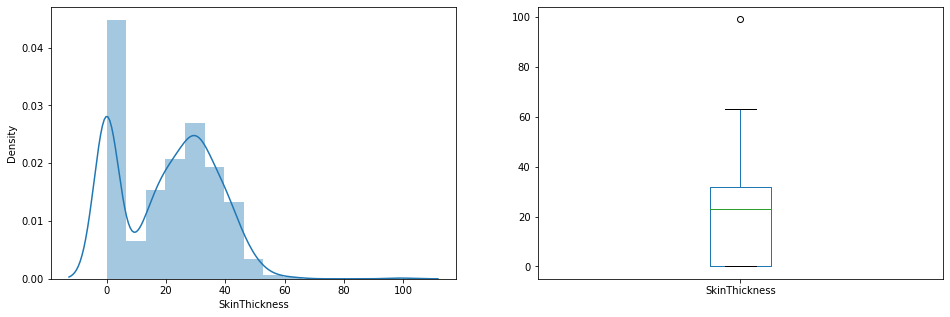

In [42]:
plt.subplot(121),sn.distplot(df['SkinThickness'])
plt.subplot(122),df['SkinThickness'].plot.box(figsize=(16,5))
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


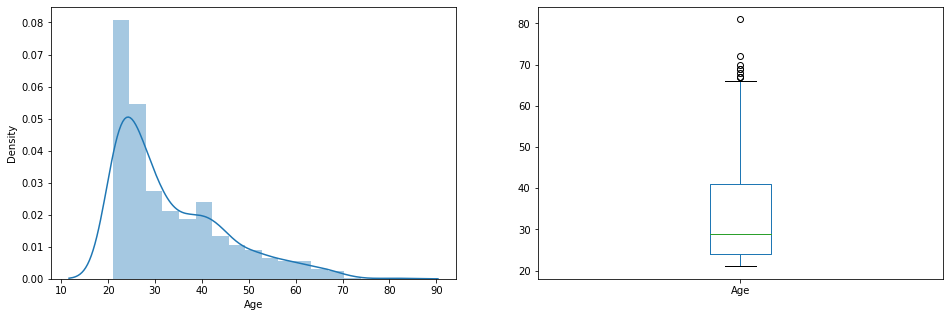

In [43]:
plt.subplot(121),sn.distplot(df['Age'])
plt.subplot(122),df['Age'].plot.box(figsize=(16,5))
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


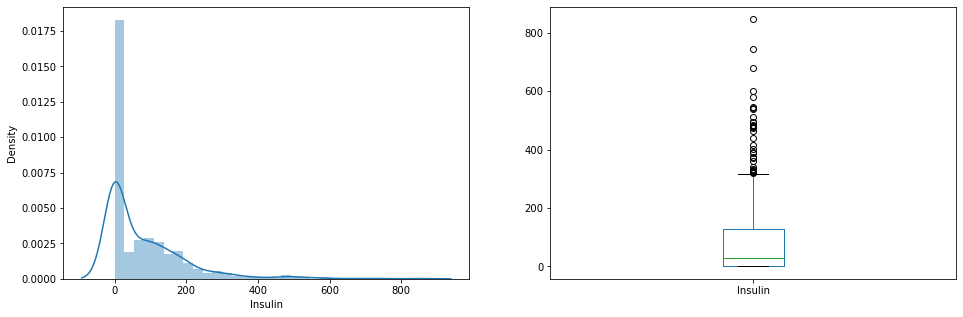

In [44]:
plt.subplot(121),sn.distplot(df['Insulin'])
plt.subplot(122),df['Insulin'].plot.box(figsize=(16,5))
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


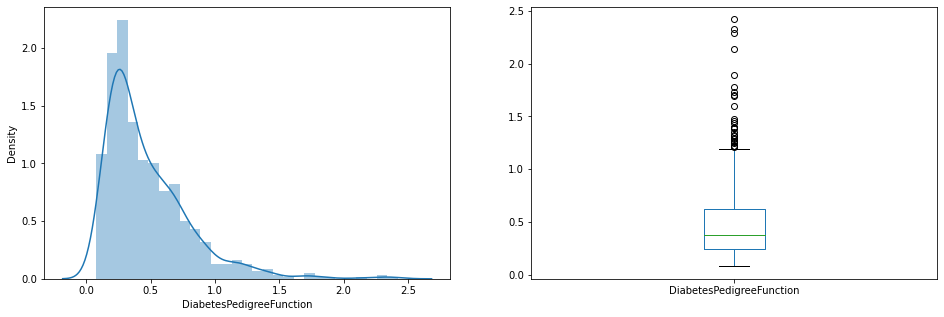

In [45]:
plt.subplot(121),sn.distplot(df['DiabetesPedigreeFunction'])
plt.subplot(122),df['DiabetesPedigreeFunction'].plot.box(figsize=(16,5))
plt.show()

# FEATURE ENGINEERING

In [65]:
feature_cols = ['Pregnancies', 'Insulin','BMI','Age','BloodPressure','DiabetesPedigreeFunction']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

In [66]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) #

In [67]:
X_train.shape

(537, 6)

In [68]:
X_test.shape

(231, 6)

In [69]:
X_test.shape

(231, 6)

In [70]:
y_test.shape

(231,)

# DECISION TREE CLASSIFIER

In [71]:
# Create Decision Tree classifier object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( )


In [72]:
# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

In [73]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [124]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [154, 231]

### The Accuracy here Obsereved is 83%.

In [78]:
confusion_matrix(y_test,y_pred)

array([[116,  39],
       [ 39,  37]], dtype=int64)

# K Nearest Neighbors Classification

In [79]:
from sklearn.neighbors import KNeighborsClassifier


In [80]:
knn = KNeighborsClassifier(n_neighbors=1)


In [81]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [82]:
pred = knn.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

# Predictions and Evaluations
Let's evaluate our KNN model!

In [83]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [84]:
print(confusion_matrix(y_test,pred))


[[111  44]
 [ 36  40]]


In [85]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.76      0.72      0.74       155
           1       0.48      0.53      0.50        76

    accuracy                           0.65       231
   macro avg       0.62      0.62      0.62       231
weighted avg       0.66      0.65      0.66       231



# Standardize the Variables¶
##Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [86]:
from sklearn.preprocessing import StandardScaler


In [87]:
scaler = StandardScaler()


In [88]:
scaler.fit(df.drop('Outcome',axis=1))


StandardScaler()

In [89]:
scaled_features = scaler.transform(df.drop('Outcome',axis=1))


In [90]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Naive Baiyes Model

In [91]:
target=df.Outcome
inputs=df.drop('Outcome',axis='columns')

In [92]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [93]:
inputs.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [94]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [97]:
len(X_train)

614

In [98]:
len(X_test)

154

In [99]:
len(inputs)

768

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
model=GaussianNB()

In [102]:
model.fit(X_train,y_train)

GaussianNB()

In [104]:
model.score(X_test,y_test)

0.7272727272727273

In [106]:
X_test[:10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
63,2,141,58,34,128,25.4,0.699,24
11,10,168,74,0,0,38.0,0.537,34
13,1,189,60,23,846,30.1,0.398,59
135,2,125,60,20,140,33.8,0.088,31
84,5,137,108,0,0,48.8,0.227,37
444,4,117,62,12,0,29.7,0.380,30
336,0,117,0,0,0,33.8,0.932,44
496,5,110,68,0,0,26.0,0.292,30
423,2,115,64,22,0,30.8,0.421,21
127,1,118,58,36,94,33.3,0.261,23


In [105]:
y_test[:10]

63     0
11     1
13     1
135    0
84     1
444    1
336    0
496    0
423    0
127    0
Name: Outcome, dtype: int64

In [44]:
model.predict(X_test[:10])

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

# Support Vector Machine

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [57]:
svc_classifier=SVC(kernel="linear",random_state=0)
svc_classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [58]:
svc_y_pred=svc_classifier.predict(X_test)

In [62]:
svc_cm=confusion_matrix(y_test,svc_y_pred)
svc_cm

array([[136,  19],
       [ 51,  25]], dtype=int64)